## Kaggle, backpack prediction challenge.


In This section of the project I perform exploratory data analysis (EDA) and preprocessing on a backpack dataset from a Kaggle competition. Here's a breakdown of the key insights obtained from this processes:

**Data Exploration:**

* **Missing Values:** The code identifies and addresses missing values in several columns ('Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)').  Different strategies are used:
    * Filling with 'Unknown' for categorical features.
    * Using the mode (with random tie-breaking) for binary features ('Laptop Compartment', 'Waterproof').
    * Imputing the mean for 'Weight Capacity (kg)'.
* **Data Types:** The code corrects data types for certain columns. 'Compartments' is converted to integer type. 'Laptop Compartment' and 'Waterproof' are converted to boolean.
* **Categorical Features:**  The analysis examines the distributions of categorical features like 'Brand', 'Material', 'Size', 'Style', and 'Color' using value counts and bar plots.  These visualizations help understand the prevalence of different categories.
* **Numerical Features:** 'Weight Capacity (kg)' and 'Price' are analyzed using box plots and descriptive statistics (mean, median, quartiles, etc.) to identify potential outliers and understand the distribution.
* **Column Renaming:** Column names are cleaned and simplified (lowercase, spaces replaced with underscores).

**Data Preprocessing:**

* **Missing Value Imputation:** As mentioned above, various methods are employed to fill in missing data. The choice of method depends on the nature of the variable.
* **Data Type Conversion:**  Columns are converted to appropriate data types.
* **Encoding Categorical Variables:** This section was left commented-out given several techniques will be studied in separate cases like One-Hot Encoding (for 'brand', 'material', 'style', and 'color') and Ordinal Encoding (for 'size').   The final dataset retains the original categorical features for now.

The notebook provides a good foundation for further analysis and model building.  In the next section of the project I will explore encoding techniques to handle categorical features and training models.


In [1]:
%pip install -q kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import opendatasets as od
#od.download('https://www.kaggle.com/competitions/playground-series-s5e2/data')
import os
import pandas as pd

# Set the environment variable to point to the directory containing kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = '/Users/czarco/Documents/kaggle/'

# Download the dataset from Kaggle
!kaggle competitions download -c playground-series-s5e2

# Unzip the downloaded files
import zipfile
with zipfile.ZipFile('playground-series-s5e2.zip', 'r') as zip_ref:
    zip_ref.extractall('playground-series-s5e2')



playground-series-s5e2.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Load the dataset
df = pd.read_csv('playground-series-s5e2/train.csv')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None


In [6]:
display(df.sample(5))

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
256750,256750,Under Armour,Canvas,Large,5.0,No,Yes,Backpack,Blue,20.976656,75.34056
23905,23905,Nike,Canvas,Large,1.0,No,No,Backpack,Blue,28.782446,144.99169
242874,242874,Puma,Nylon,Small,7.0,Yes,No,Backpack,Red,13.244225,139.83144
263250,263250,Puma,Polyester,Small,3.0,No,Yes,NaN,Pink,6.086048,149.91388
150997,150997,Adidas,Canvas,Small,9.0,Yes,Yes,Backpack,Black,25.251532,45.60507


# Exploratory Data Analysis.

In [7]:
# check if there is fully duplicated rows
df.duplicated().sum()

0

In [8]:
# check for missing values
df.isna().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [9]:
# print column names
df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

- Brand column

In [10]:
# check brand distribution while keeping NaNs
df['Brand'].value_counts(dropna=False)

Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
NaN              9705
Name: count, dtype: int64

In [11]:
# Barplot Brand column
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.countplot(df['Brand'])
#plt.show()

- Material column

In [12]:
# check Material column distribution
df['Material'].value_counts(dropna=False)

Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
NaN           8347
Name: count, dtype: int64

In [13]:
# barplot vertically Material column
#sns.countplot(df['Material'])
#plt.show()

In [14]:
# check Size distribution, keep NaNs
df['Size'].value_counts(dropna=False)

Size
Medium    101906
Large      98643
Small      92856
NaN         6595
Name: count, dtype: int64

In [15]:
# barplot Size column
#sns.countplot(df['Size'])
#plt.show()

In [16]:
# ckeck Compartments dristribution
df['Compartments'].value_counts(dropna=False)

Compartments
1.0     31568
4.0     31498
2.0     30595
3.0     30293
7.0     30158
9.0     29965
5.0     29959
10.0    29815
8.0     28909
6.0     27240
Name: count, dtype: int64

In [17]:
# check Laptop Compartment column
df['Laptop Compartment'].value_counts(dropna=False)

Laptop Compartment
Yes    148342
No     144214
NaN      7444
Name: count, dtype: int64

In [18]:
# check Waterproof column
df['Waterproof'].value_counts(dropna=False)

Waterproof
Yes    148077
No     144873
NaN      7050
Name: count, dtype: int64

In [19]:
# Check Style column distribution
df['Style'].value_counts(dropna=False)

Style
Messenger    100031
Tote          97438
Backpack      94561
NaN            7970
Name: count, dtype: int64

In [20]:
# check Color column distribution
df['Color'].value_counts(dropna=False)

Color
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
NaN       9950
Name: count, dtype: int64

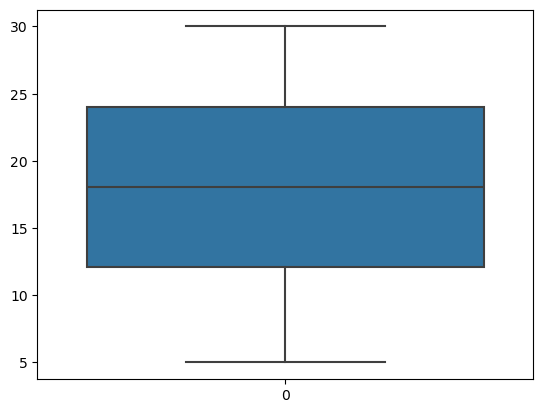

In [22]:
# boxplot Weight Capacity (kg) column
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Weight Capacity (kg)'])
plt.show()

In [23]:
# Describe Weight Capacity (kg) column
df['Weight Capacity (kg)'].describe()

count    299862.000000
mean         18.029994
std           6.966914
min           5.000000
25%          12.097867
50%          18.068614
75%          24.002375
max          30.000000
Name: Weight Capacity (kg), dtype: float64

In [24]:
# how many missing values in Weight Capacity (kg) column?
df['Weight Capacity (kg)'].isna().sum()

138

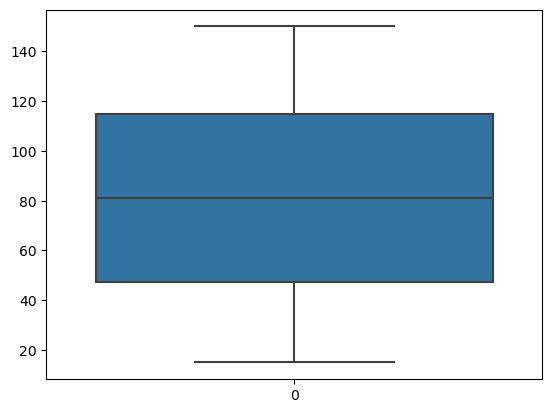

In [25]:
# boxplot vertically Price column
sns.boxplot(df['Price'])
plt.show()

In [26]:
# describe Price column
df['Price'].describe()

count    300000.000000
mean         81.411107
std          39.039340
min          15.000000
25%          47.384620
50%          80.956120
75%         115.018160
max         150.000000
Name: Price, dtype: float64

- columns names can be lower cased and simplified.
- Brand is categorical and NaN values must be addressed.
- Material column has NaN values and must addressed.
- Size column has NaN values.
- Compartments column has no missing values but needs to chage its type.
- Laptop Compartment has missing values, is fairly balanced and must be change to Bool.
- Waterproof column has NaNs, balanced and should be bool.
- Style is also categorical, presents NaNs.
- Color also Categorical, has Nans.
- Weight Capacity (kg) has few NaNs, maybe filled with mean?

# Data proccessing.

- rename columns to follow snake_case style.

In [27]:
# rename column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [28]:
# print column names
df.columns

Index(['id', 'brand', 'material', 'size', 'compartments', 'laptop_compartment',
       'waterproof', 'style', 'color', 'weight_capacity_(kg)', 'price'],
      dtype='object')

In [29]:
df = df.rename(columns={'weight_capacity_(kg)': 'weight_cap', 'price': 'Price'})

In [30]:
#print(df.info())

- Fix 'brand' missing values.

In [31]:
df['brand'].fillna('Unknown', inplace=True)

In [32]:
#df.info()

- fix material missing values.

In [33]:
# fix 'material' missing values
df['material'].fillna('Unknown', inplace=True)

In [34]:
# fix 'size' missing values
df['size'].fillna('Unknown', inplace=True)

In [35]:
# change 'compartments' column to int type
df['compartments'] = df['compartments'].astype('int')

In [36]:
# change laptop_compartments to bool values
df['laptop_compartment'] = df['laptop_compartment'].map({'Yes': True, 'No': False})

In [37]:
df['laptop_compartment'].value_counts(dropna=False)

laptop_compartment
True     148342
False    144214
NaN        7444
Name: count, dtype: int64

- Using the Mode (with Random Tie-breaking) to fill laptop_compartment missing values.

In [38]:
import random

mode = df['laptop_compartment'].mode()[0]  # Get the mode
if random.choice([True, False]):  # Introduce random tie-breaking
    fill_value = mode
else:
    fill_value = not mode  # Choose the opposite of mode with 50% chance

df['laptop_compartment'].fillna(fill_value, inplace=True)

In [39]:
df['waterproof'].value_counts(dropna=False)

waterproof
Yes    148077
No     144873
NaN      7050
Name: count, dtype: int64

- 'waterproof' has a similar problem as laptop_compartment

In [40]:
# change 'waterproof' Yes/No values to bool values
df['waterproof'] = df['waterproof'].map({'Yes': True, 'No': False})

In [41]:
mode = df['waterproof'].mode()[0]
if random.choice([True, False]):
    fill_value = mode
else:
    fill_value = not mode

df['waterproof'].fillna(fill_value, inplace=True)

In [42]:
df['waterproof'].value_counts(dropna=False)

waterproof
False    151923
True     148077
Name: count, dtype: int64

- Fill missing values in 'Style' column with Unknown

In [43]:
df['style'].fillna('Unknown', inplace=True)

In [44]:
df['color'].fillna('Unknown', inplace=True)

In [45]:
df['weight_cap'].describe()

count    299862.000000
mean         18.029994
std           6.966914
min           5.000000
25%          12.097867
50%          18.068614
75%          24.002375
max          30.000000
Name: weight_cap, dtype: float64

In [46]:
df['weight_cap'].fillna(df['weight_cap'].mean(), inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  300000 non-null  int64  
 1   brand               300000 non-null  object 
 2   material            300000 non-null  object 
 3   size                300000 non-null  object 
 4   compartments        300000 non-null  int64  
 5   laptop_compartment  300000 non-null  bool   
 6   waterproof          300000 non-null  bool   
 7   style               300000 non-null  object 
 8   color               300000 non-null  object 
 9   weight_cap          300000 non-null  float64
 10  Price               300000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 21.2+ MB


In [48]:
# save this corrected dataframe in my drive
#from google.colab import drive
#drive.mount('/content/drive')
#df.to_csv('/content/drive/My Drive/categorical_backpack.csv', index=False)

In [49]:
# write the corrected dataframe to a new csv file
df.to_csv('cat_backpack.csv', index=False)

# Variables Encoding.

- This step will be done in a separate file to explore the various techniques available to handle categorical variables.

- One Hot Encoding for categorical variables : brand, material, style and color

- Ordinal encoding for size variable.